IndexError: list assignment index out of range

<Figure size 432x288 with 0 Axes>

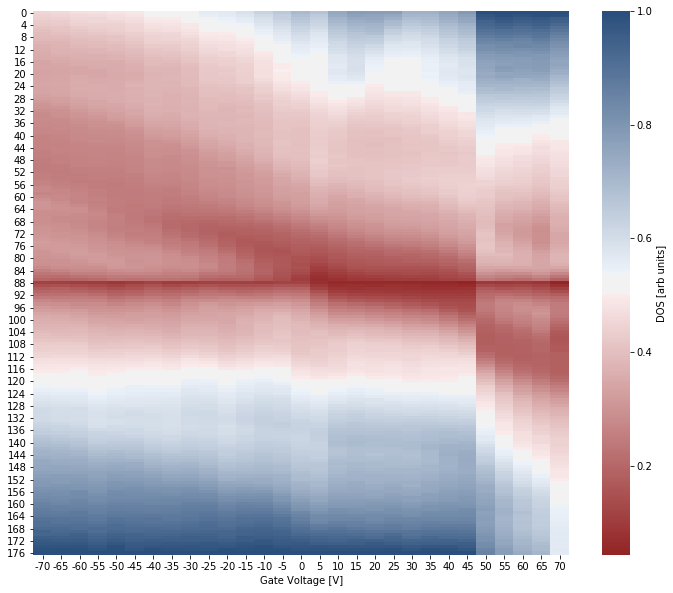

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.clf()

# _______ define all variables for plotting and importing data ________

date = "180817"
currentsetpoint = "3n"

maxbias = 500
minbias = -500
biaspoints = 201

biassteps = (maxbias - minbias) / biaspoints

maxgate = 70
mingate = -70
gatestep = 5

phononupperindex = 170
phononlowerindex = 230

# ________ end definitions ________


gatebias = np.arange(mingate,maxgate + gatestep, gatestep)

a0 = np.genfromtxt("/Users/wyatt/Desktop/BLGSweeps/" + date + "_BLG_on_Si_" + currentsetpoint + "_" + str(gatebias[0]) + "V_tipbias00001.dat",dtype=float,comments="#",usecols=(3,),skip_header=37)
a0 = ((a0 - np.amin(a0))/(np.amax(a0)-np.amin(a0)))
a0 = np.delete(a0,np.s_[88:112])

for i in range(1,int((maxgate - mingate) / gatestep) + 1):
    #if gatebias[i] == 45 or 50 or 55 or 60 or 70:
    #    current = np.genfromtxt("/Users/wyatt/Desktop/BLGSweeps/" + date + "_BLG_on_Si_" + currentsetpoint + "_" + str(gatebias[i]) + "V_tipbias00002.dat",dtype=float,comments="#",usecols=(3,),skip_header=37)
    current = np.genfromtxt("/Users/wyatt/Desktop/BLGSweeps/" + date + "_BLG_on_Si_" + currentsetpoint + "_" + str(gatebias[i]) + "V_tipbias00001.dat",dtype=float,comments="#",usecols=(3,),skip_header=37)
    current = ((current - np.amin(current))/(np.amax(current)-np.amin(current)))
    current = np.delete(current,np.s_[88:112])
    if i == 1:
        sweep = np.vstack([a0,current])
    else:
        sweep = np.vstack([sweep,current])
    
#sweep = np.column_stack((bb,aa,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,uu,tt))

sweep = sweep.transpose()

plt.figure(figsize=(12,10))
plt.title
cmap = sns.diverging_palette(12, 250, l = 33, as_cmap=True)
ax = sns.heatmap(sweep, cbar_kws={'label': 'DOS [arb units]'},cmap = cmap)

labelz = [item.get_text() for item in ax.get_xticklabels()]

xgateticks = np.arange(mingate,maxgate + 5,5)
for j in range(0,int((maxgate*2)/gatestep) + 1):
    labelz[j] = xgateticks[j]
ax.set_xticklabels(labelz)
plt.xlabel('Gate Voltage [V]')

labels = [item.get_text() for item in ax.get_yticklabels()]
bias = np.arange(minbias,maxbias + 20,20)
for i in range(0,51):
    labels[i] = bias[i]
ax.set_yticklabels(labels)
plt.ylabel('Sample Bias [mV]')
         
plt.show()